In [3]:
#all imports
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forPredictions/2026predictedparkingdata_streamlined.csv')
df.head()



,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 General Spaces,LOT 4 Premium % Capacity,LOT 4 Premium Occupied,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces
0,1/1/2026,Thursday,0.527258,642.792556,1214,0.809905,279.417319,345,0.491138,584.620726,...,1430,0.929639,327.211238,350,0.129152,343.354141,2296,0.562081,751.141341,1337
1,1/2/2026,Friday,0.509745,621.379600,1214,0.764629,263.797007,345,0.539308,642.855187,...,1430,0.865187,304.545679,350,0.132229,354.161148,2296,0.588328,782.387639,1337
2,1/3/2026,Saturday,0.502386,612.409107,1214,0.756190,260.885471,345,0.526308,627.358690,...,1430,0.889009,312.955929,350,0.133018,361.262036,2296,0.606297,808.445131,1337
3,1/4/2026,Sunday,0.493098,601.086577,1214,0.711331,245.409052,345,0.514650,613.462319,...,1430,0.856413,301.251741,350,0.188634,476.893929,2296,0.543942,731.600061,1337
4,1/5/2026,Monday,0.505697,616.445107,1214,0.751551,259.285119,345,0.457503,545.177587,...,1430,0.886086,312.796886,350,0.143745,365.351832,2296,0.531519,700.942444,1337


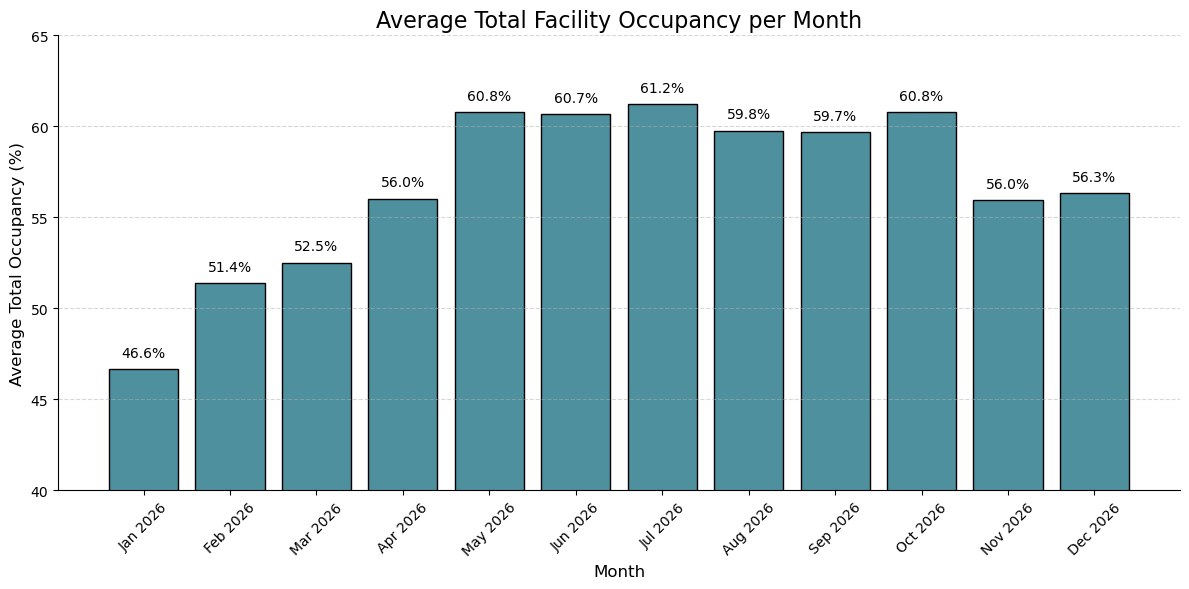

In [11]:

# --- Ensure datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Compute total occupancy across all lots per day ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)

df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)

df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']

# --- Group by month ---
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 65)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()
